In [2]:
from qutip.wigner import qfunc
from qst_nn.utils import plot_confusion_matrix, plot_husimi_directly
from qst_nn.ops import cat, num, thermal_dm, binomial, coherent_dm, fock_dm, gkp
from qst_nn.ops import random as ops_random
import qst_nn.ops

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

xgrid = 32
ygrid = 32

xvec = np.linspace(-5, 5, xgrid)
yvec = np.linspace(-5, 5, ygrid)
g_scale = 2

fig_width_pt = 246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]
params = {# 'backend': 'ps',
          'axes.labelsize': 8,
          'font.size': 8,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'axes.labelpad': 1,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
figpath = "figures/"


class Data_generator():
    '''
    Data generator for training and testing
    state_gen(): generate state
    dataset_gen(): generate dataset
    '''
    def __init__(self):
        self.label_map = {0:'fock_dm',
                          1:'coherent_dm',
                          2:'thermal_dm',
                          3:'num',
                          4:'binomial',
                          5:'cat',
                          6:'gkp',
                          7:'random'}

    def state_gen(self,
                  state,
                  num_samples=1,):
        
        d_list = 0
        
        if state == 'fock_dm':
            d_list = [qfunc(fock_dm(32)[0], xvec, yvec, g=g_scale) for _ in np.arange(num_samples)]
        elif state == 'coherent_dm':
            d_list = [qfunc(coherent_dm(32)[0], xvec, yvec, g=g_scale) for _ in np.arange(num_samples)]
        elif state == 'thermal_dm':
            d_list = [qfunc(thermal_dm(32)[0], xvec, yvec, g=g_scale) for _ in np.arange(num_samples)]
        elif state == 'num':
            d_list = [qfunc(num(32)[0], xvec, yvec, g=g_scale) for _ in np.range(num_samples)]
        elif state == 'binomial':
            d_list = [qfunc(binomial(32)[0], xvec, yvec, g=g_scale) for _ in np.arange(num_samples)]
        elif state == 'cat':
            d_list = [qfunc(cat(32)[0], xvec, yvec, g=g_scale) for _ in np.arange(num_samples)]
        elif state == 'gkp':
            d_list = [qfunc(gkp(32)[0], xvec, yvec, g=g_scale) for _ in np.arange(num_samples)]
        elif state == 'random':
            d_list = [qfunc(ops_random(32)[0], xvec, yvec, g=g_scale) for _ in np.arange(num_samples)]
        else: 
            raise Exception("Please insert existing state")
        
        if len(d_list) == 1: d_list = d_list[0]
        
        return d_list
        
    def dataset_gen(self,
                    dataset_size=10000,
                    train_split=0.8,
                    to_file = True,
                    train_file_dir='./oqt_train.npy',
                    test_file_dir='./oqt_test.npy'):
        
        train_size = round(dataset_size*train_split)
        test_size = dataset_size-train_size
        train_set = []
        test_set = []
        
        for _ in np.arange(train_size):
            label = np.random.randint(8)
            train_set.append([self.state_gen(self.label_map.get(label)), label])
        
        train_set = np.array(train_set, dtype=object)
        
        if to_file: 
            np.save(train_file_dir, train_set)
        
        for _ in np.arange(test_size):
            label = np.random.randint(7)
            test_set.append([self.state_gen(self.label_map.get(label)), label])
            
        test_set = np.array(test_set, dtype=object)

        if to_file: 
            np.save(test_file_dir, test_set)
            
        return train_set, test_set
      
data_gen = Data_generator()
x, y = data_gen.dataset_gen()

2022-11-18 10:50:12.794277: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 10:50:15.396896: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-18 10:50:20.934445: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-18 10:50:20.934810: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

In [5]:
train = np.load('oqt_train.npy', allow_pickle=True)
test = np.load('oqt_test.npy', allow_pickle=True)
print(len(train))

8


In [4]:
class state_husimi_visualizer():
    
    #visualizing husimi of states with different parameter
    
    def __init__(self):
        pass
        
    def plot_state(self,
                   state,
                   subtitles=None,
                   title="",
                   num_samples = 4,
                   cmap=None,
                   xvec=None,
                   yvec=None,
                   norm=None,
                   normalize=True,
                   cbar_ticks=None, 
                   cbar_ticklabels = None):
        
        if xvec is None:
            xvec = np.linspace(-5, 5, 32)
        if yvec is None:
            yvec = np.linspace(-5, 5, 32)
            
        fig_width_pt = 400.0  # Get this from LaTeX using \showthe\columnwidth
        inches_per_pt = 1.0/72.27               # Convert pt to inch
        golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
        fig_width = fig_width_pt*inches_per_pt  # width in inches
        fig_height = fig_width*golden_mean      # height in inches
        fig_size =  [fig_width,fig_height]
        
        params = {# 'backend': 'ps',
          'axes.labelsize': 8,
          'font.size': 8,
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'axes.labelpad': -1,
          'text.usetex': False,
          'figure.figsize': fig_size}
        plt.rcParams.update(params)
        
        d_list = []
        
        if state == 'fock':
            d_list = [qfunc(fock_dm(32)[0], xvec, yvec, g=2) for _ in range(num_samples)]
        elif state == 'coherent':
            d_list = [qfunc(coherent_dm(32)[0], xvec, yvec, g=2) for _ in range(num_samples)]
        elif state == 'thermal':
            d_list = [qfunc(thermal_dm(32)[0], xvec, yvec, g=2) for _ in range(num_samples)]
        elif state == 'num':
            d_list = [qfunc(num(32)[0], xvec, yvec, g=2) for _ in range(num_samples)]
        elif state == 'binomial':
            d_list = [qfunc(binomial(32)[0], xvec, yvec, g=2) for _ in range(num_samples)]
        elif state == 'cat':
            d_list = [qfunc(cat(32)[0], xvec, yvec, g=2) for _ in range(num_samples)]
        elif state == 'gkp':
            d_list = [qfunc(gkp(32)[0], xvec, yvec, g=2) for _ in range(num_samples)]
        elif state == 'random':
            d_list = [qfunc(ops_random(32)[0], xvec, yvec, g=2) for _ in range(num_samples)]
        else: 
            raise Exception("Please insert existing state")
                                
        fig, ax = plt.subplots(1, num_samples, figsize=(fig_width, 0.3*fig_width), sharey=True, sharex=True)

        if norm is None:
            norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

        if cmap is None:
            colors1 = colors.LinearSegmentedColormap.from_list("", [(0, "white"),
                                                            (1, "red"),
                                                           ])(np.linspace(0, 1, 256))

            cmap = colors.LinearSegmentedColormap.from_list('my_colormap', colors1)
        
        if normalize:
            for i in range(num_samples):
                d_list[i] = d_list[i]/np.max(d_list[i])
                

                                       
        for i in range(num_samples):
            im = ax[i].pcolor(xvec, yvec, d_list[i],
                          norm=norm,
                          cmap=cmap)
            
        for axis in ax:
            axis.set_xticks([-xvec[-1], 0,  xvec[-1]])
            axis.set_yticks([-yvec[-1], 0, yvec[-1]])
            axis.set_xlabel(r"Re($\beta$)", labelpad=-6)    
            axis.set_aspect("equal")
            
        ax[0].set_xticklabels(["{:.0f}".format(-xvec[-1]), "", "{:.0f}".format(xvec[-1])])
        ax[0].set_yticklabels(["{:.0f}".format(-yvec[-1]), "", "{:.0f}".format(yvec[-1])])

        if subtitles != None:
            for i in range(num_samples):
                ax[i].set_title(subtitles[i])

        ax[0].set_ylabel(r"Im($\beta$)", labelpad=-9)

        fig.subplots_adjust(right=0.85, wspace=0.01, hspace=-7.6)

        cax = fig.add_axes([0.864, 0.19, 0.01, 0.63])

        if cbar_ticks is None:
            cbar_ticks = [0, 0.5, 1]
            cbar_ticklabels = ["0", 0.5, "1"] 
        fig.colorbar(im, cax=cax, ticks=cbar_ticks)
        cax.set_yticklabels(cbar_ticklabels)
        plt.subplots_adjust(wspace=0.15)

        if subtitles != None:
            if title:
                plt.suptitle(title)
        else:
            plt.suptitle(title, y=.98)

        return fig, ax

/tmp/ipykernel_40465/1768979956.py:83: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax[i].pcolor(xvec, yvec, d_list[i],


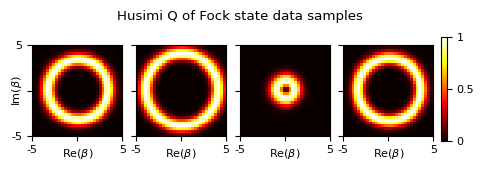

In [5]:
visualizer = state_husimi_visualizer()
fig, ax = visualizer.plot_state('fock', title='Husimi Q of Fock state data samples', cmap="hot")
plt.savefig('fock.png')
plt.show()